In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [3]:
base_dir = "E:/THESIS MALARIA/cell_images/"
base_path = Path(base_dir)
base_path

WindowsPath('E:/THESIS MALARIA/cell_images')

Classes to classify: 
 ['Parasitized', 'Uninfected']


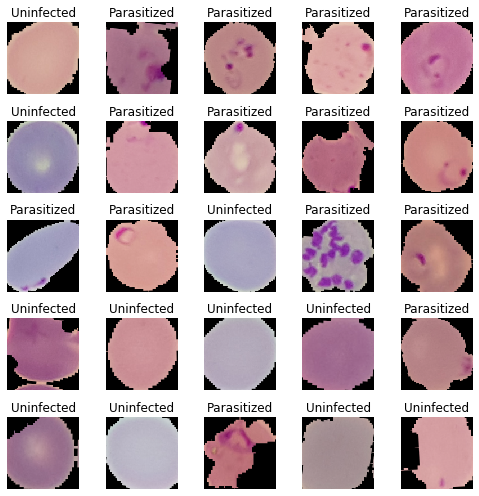

In [4]:
data = ImageDataBunch.from_folder(base_path,valid_pct=0.1,                                 
                                 train='.',
                                 ds_tfms=get_transforms(max_warp=0,flip_vert=True),
                                 size=128,bs=32,
                                 num_workers=0).normalize(imagenet_stats)

print(f'Classes to classify: \n {data.classes}')
data.show_batch(rows=5,figsize=(7,7))

In [5]:
learner = create_cnn(data,models.resnet50,metrics=accuracy,model_dir='/tmp/model/')
learner.lr_find()
learner.recorder.plot()

C:\ProgramData\Anaconda3\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [6]:
learner.fit_one_cycle(5,max_lr=slice(1e-4,1e-3))
learner.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

ValueError: zero-size array to reduction operation minimum which has no identity

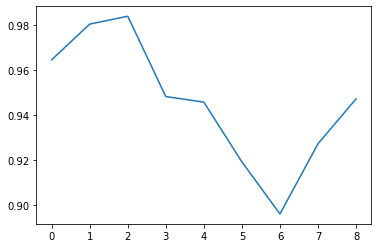

In [7]:
learner.recorder.plot_losses()

In [ ]:
inter = ClassificationInterpretation.from_learner(learner)
inter.plot_top_losses(9,figsize=(20,20))

In [ ]:
inter.plot_confusion_matrix(figsize=(10,10),dpi=100)

In [12]:
learner.unfreeze()
learner.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.184098,0.188085,0.925590,03:04
1,0.107358,0.088589,0.973140,03:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


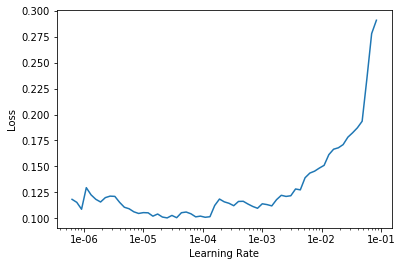

In [14]:
learner.lr_find()
learner.recorder.plot()

In [15]:
learner.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.111598,0.088438,0.971688,03:15
1,0.098868,0.087041,0.972414,03:10
2,0.094224,0.082718,0.975318,03:10
3,0.100667,0.082127,0.973866,03:06
4,0.093792,0.080145,0.976407,03:03


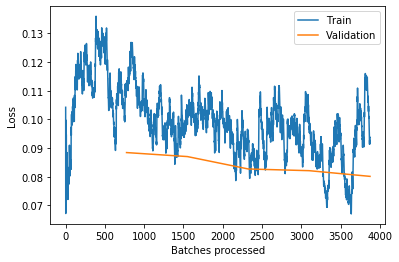

In [16]:
learner.recorder.plot_losses()

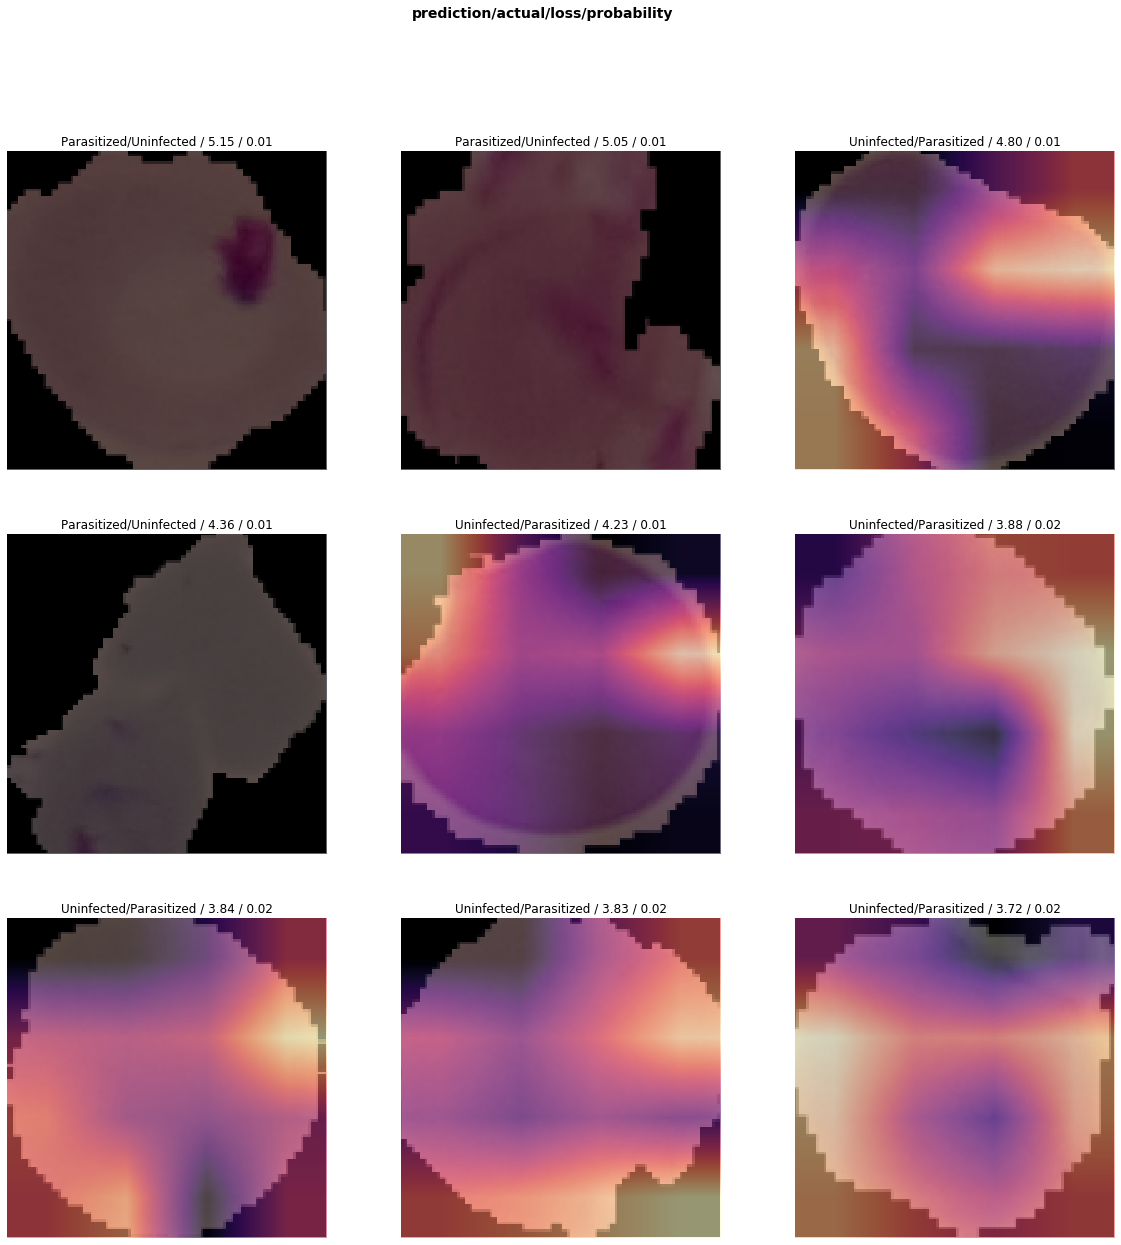

In [17]:
inter = ClassificationInterpretation.from_learner(learner)
inter.plot_top_losses(9,figsize=(20,20))

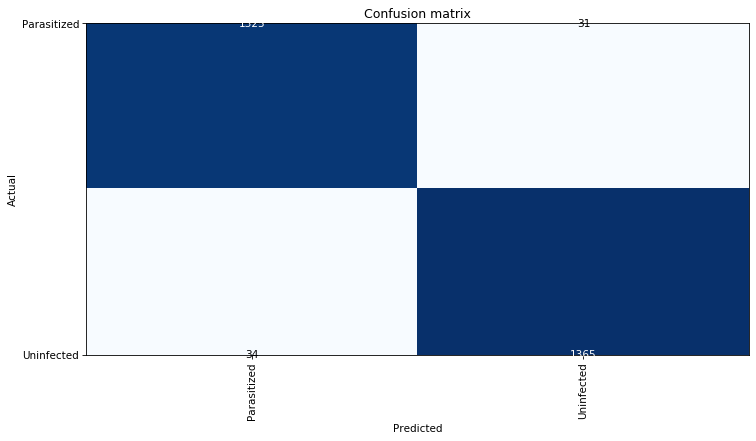

In [18]:
inter.plot_confusion_matrix(figsize=(10,10),dpi=75)
learner.save('malaria-fastai-V1')